# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
total_rides_count = pyber_data_df["ride_id"].count()
total_rides_count

2375

In [ ]:
# Create the separate Urban city DataFrame. (Optional output)
#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#urban_cities_df.head()

In [ ]:
#urban_cities_df.count()

In [ ]:
# Create the separate Suburban city DataFrame.  (Optional output)
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#suburban_cities_df.head()

In [ ]:
# Create the separate Rural city DataFrame.  (Optional output)
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
#rural_cities_df.head()

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
rides_count_bycitytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_count_bycitytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [ ]:
#total_rides_count = urban_cities_df.count()["ride_id"]
#total_urban_rides_count

In [ ]:
#total_suburban_rides_count = suburban_cities_df["ride_id"].count()
#total_suburban_rides_count

In [ ]:
#total_rural_rides_count = rural_cities_df["ride_id"].count()
#total_rural_rides_count

In [5]:
# 2. Get the total drivers for each city type
# per class chat comments use only the city data dataframe
drivers_count_bycitytype = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_count_bycitytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fare_amount_bycitytype = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_amount_bycitytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
total_fare_amounts = fare_amount_bycitytype.sum()
total_fare_amounts

63538.64

In [8]:
# In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
#  4. Get the average fare per ride for each city type. 
avg_fare_bycitytype = fare_amount_bycitytype / rides_count_bycitytype
avg_fare_bycitytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [ ]:
# Get summary statistics.
#urban_cities_df.describe()

In [ ]:
#suburban_cities_df.describe()

In [ ]:
#rural_cities_df.describe()

In [9]:
# 5. Get the average fare per driver for each city type. 
# In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers
avg_fare_perdriver_bycitytype = fare_amount_bycitytype / drivers_count_bycitytype
avg_fare_perdriver_bycitytype

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [ ]:
# ignore this 
#urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
#suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
#rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [24]:
#  6. Create a PyBer summary DataFrame. 
# WATCH YOUR SYNTAX! BRACKETS ARE NOT NEEDED
pyber_summary_df = pd.DataFrame({
    "Total Rides": rides_count_bycitytype, 
    "Total Drivers": drivers_count_bycitytype, 
    "Total Fares": fare_amount_bycitytype,
    "Average Fare per Ride": avg_fare_bycitytype, 
    "Average Fare per Driver": avg_fare_perdriver_bycitytype})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [25]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [26]:
# check your data types
#pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [27]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [49]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [50]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# peek first
#pyber_data_df.groupby(["type", "date"]).sum()["fare"]

#set variable
fare_sum_bytypedate_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fare_sum_bytypedate_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [51]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum_bytypedate_df = fare_sum_bytypedate_df.reset_index()
fare_sum_bytypedate_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [52]:
# Get the datatypes for the DataFrame columns.
fare_sum_bytypedate_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [53]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_bytypedate_pivot = fare_sum_bytypedate_df.pivot(index="date", columns="type", values="fare")
fare_sum_bytypedate_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [77]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_Apr = fare_sum_bytypedate_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_Apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [85]:
fare_sum_bytypedate_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [88]:
weekly_summary = fare_sum_bytypedate_df.resample('W', on='date').sum()
weekly_summary

,fare
date,
2019-01-06,2571.20
2019-01-13,3223.21
2019-01-20,3463.22
2019-01-27,3512.48
2019-02-03,3462.81
2019-02-10,3252.78
2019-02-17,3376.39
2019-02-24,4298.09
2019-03-03,3251.80


In [79]:
#fares_Jan_Apr['date'] = pd.to_datetime(fares_Jan_Apr['date'])
#fares_Jan_Apr_df = fares_Jan_Apr.set_index('date') 
#weekly_summary = fares_Jan_Apr_df.story_point.resample('W').sum()
#weekly_summary

In [80]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_sum_bytypedate_df['date']= pd.to_datetime(fare_sum_bytypedate_df['date'])

In [81]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_sum_bytypedate_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [82]:
# not useful
#fare_sum_bytypedate_df.info

In [84]:
weekly_summary = fare_sum_bytypedate_df.resample('W', on='date').sum()
weekly_summary
# I'm missing columns of information!!

,fare
date,
2019-01-06,2571.20
2019-01-13,3223.21
2019-01-20,3463.22
2019-01-27,3512.48
2019-02-03,3462.81
2019-02-10,3252.78
2019-02-17,3376.39
2019-02-24,4298.09
2019-03-03,3251.80


In [61]:
fare_sum_resample_df = fare_sum_bytypedate_df.set_index('date').resample('1H').pad()
print (fare_sum_resample_df)

# error ... Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'
# solution source: https://stackoverflow.com/questions/55474088/only-valid-with-datetimeindex-timedeltaindex-or-periodindex-but-got-an-instanc

# this isn't like the example!

                         type   fare
date                                
2019-01-01 00:00:00       NaN    NaN
2019-01-01 01:00:00  Suburban  47.74
2019-01-01 02:00:00  Suburban  47.74
2019-01-01 03:00:00  Suburban  24.07
2019-01-01 04:00:00     Urban   7.57
...                       ...    ...
2019-05-08 09:00:00     Urban  18.55
2019-05-08 10:00:00     Urban  18.55
2019-05-08 11:00:00     Urban  18.55
2019-05-08 12:00:00     Urban  19.77
2019-05-08 13:00:00     Urban  19.77

[3062 rows x 2 columns]


In [74]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares= fare_sum_resample_df.resample('W').count()
weekly_fares.head(10)
# the above really didn't help

,type,fare
date,,
2019-01-06,143,143
2019-01-13,168,168
2019-01-20,168,168
2019-01-27,168,168
2019-02-03,168,168
2019-02-10,168,168
2019-02-17,168,168
2019-02-24,168,168
2019-03-03,168,168


In [63]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



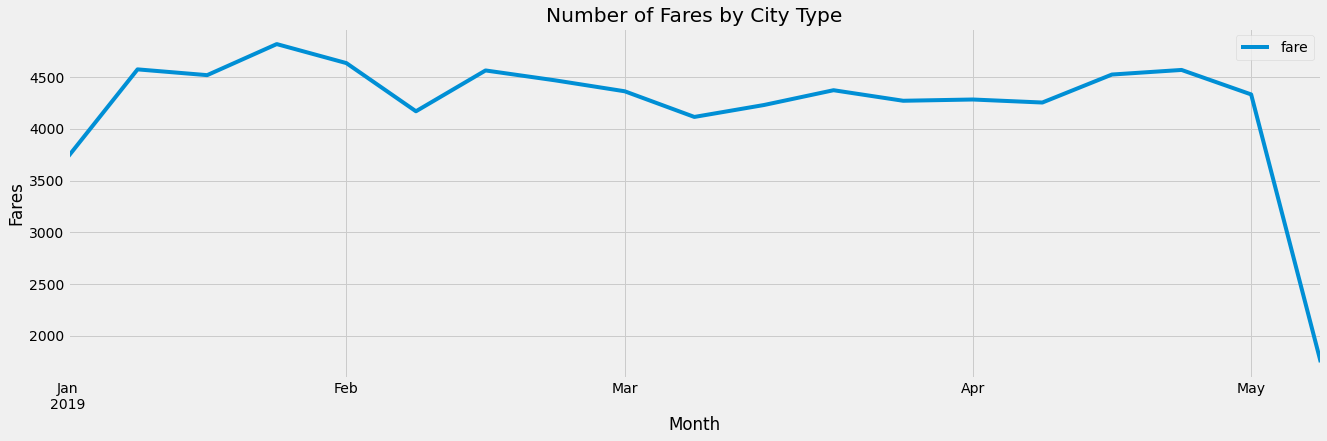

<Figure size 432x288 with 0 Axes>

In [68]:
weekly_fares = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Number of Fares by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Month")
weekly_fares.set_ylabel("Fares")

plt.show()
plt.tight_layout()

# Epic fail!!!!